# Change in GDP

In [2]:
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from data import COUNTRIES, get_all_data_and_labels
from indicators import *
from signal_math import *
from stats import *
from utils import *

plt.rcParams["figure.figsize"] = (10, 4)

# Initialize the data
all_data, all_labels = get_all_data_and_labels()
all_data_clean, all_labels_clean = get_all_data_and_labels(cleaned=True)

for i, label in enumerate(all_labels):
    vars()[label] = all_data[i]
    
for i, label in enumerate(all_labels_clean):
    vars()[label] = all_data_clean[i]
    
print(*all_labels, sep='\n')

# Get daily returns benchmark
bond_rets_daily = bond_rets_local_fx.pct_change()

bond_rets_local_fx
equity_prices
curr_acct_nom_usd
curr_acct_pct_gdp
fx_trd_wts_nom
fx_trd_wts_real
fx_vs_usd
fx_to_usd
gdp_nom
gdp_real
short_rates
long_rates
core_cpi_sa
m1_usd
m2_usd
m3_usd


Keep in mind what we are competing against:

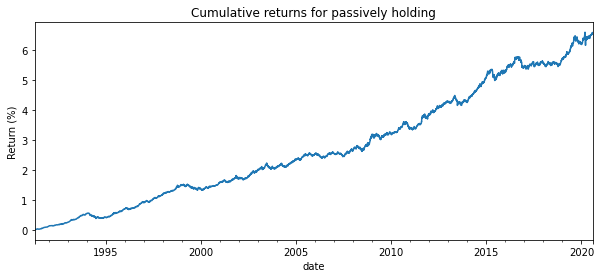

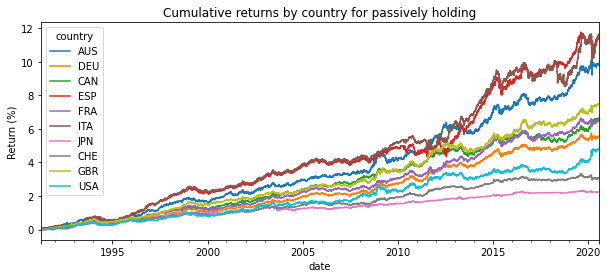

In [3]:
# Cumulative returns from holding
((1 + bond_rets_daily.dropna().mean(axis=1)).cumprod() - 1).plot(
    title='Cumulative returns for passively holding',
    ylabel='Return (%)'
)

((1 + bond_rets_daily.dropna()).cumprod() - 1).plot(
    title='Cumulative returns by country for passively holding',
    ylabel='Return (%)'
)

plt.show()

## Change in GDP

I implement the prospectus' component for change in GDP as follows:

- Compute $\Delta GDP = \text{1-quarter percent change in GDP}$ <br/><br/>

- Compute $\Delta GDP_{\text{smooth}} = \text{2-quarter rolling mean of } \Delta GDP$. I found that this provides better results, and the prospectus suggests potentially taking smoother long-term changes.<br/><br/>

- Compute the relative indicator by subtracting the global average <br/><br/>

- Standardize that relative indicator to each country's history of the indicator



Total cumulative return: 0.11244110835373688
Cumulative return by country: country
AUS    0.097879
DEU    0.066602
CAN    0.472428
ESP    0.045357
FRA    0.246846
ITA   -0.279362
JPN   -0.061470
CHE    0.297443
GBR   -0.094464
USA    0.399314
dtype: float64


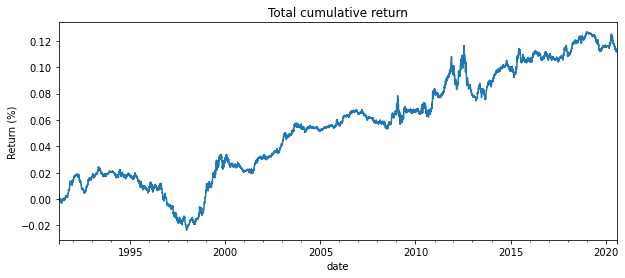

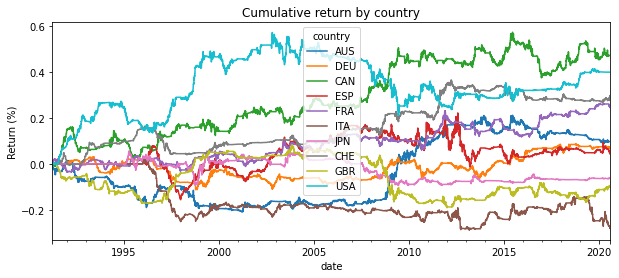

In [26]:
# Compute the signals (and indicators)
inds, sigs = test_indicator(
    change_in_gdp_indicator,
    index=gdp_nom.index,
    data=(gdp_nom,)
)

# Calculate returns
total_rets, country_rets = calculate_returns(*make_comparable(sigs, bond_rets_daily))
print('Total cumulative return:', (1 + total_rets).product() - 1)
print('Cumulative return by country:', (1 + country_rets).product() - 1)

# Plot
((1 + total_rets).cumprod() - 1).plot(
    title='Total cumulative return',
    ylabel='Return (%)'
)
((1 + country_rets).cumprod() - 1).plot(
    title='Cumulative return by country',
    ylabel='Return (%)'
)

plt.show()